## matplotlib + 한글 (Ubuntu Linux)

- https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html

In [1]:
%matplotlib inline

### 기본정보 확인

In [2]:
# 실행중인 운영체제 확인

import platform

platform.platform()

'Linux-5.8.0-44-generic-x86_64-with-glibc2.29'

In [3]:
# 파이썬 버젼 확인

import sys

sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)

In [4]:
# matplotlib 중요 설치 정보

import matplotlib

print("버   젼 :", matplotlib.__version__)
print("설치위치 :", matplotlib.__file__)
print("설   정 :", matplotlib.get_configdir())
print("캐   시 :", matplotlib.get_cachedir())


버   젼 : 3.3.4
설치위치 : /home/mspark/.local/lib/python3.8/site-packages/matplotlib/__init__.py
설   정 : /home/mspark/.config/matplotlib
캐   시 : /home/mspark/.cache/matplotlib


### 한글이 포함된 간단한 챠트

In [5]:
# 랜덤 데이타 생성

import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([  -8,  -99,  -95,  -24,   75,   -2,  -44, -140, -150,  -67,   13,
        -54,  -56,  -74,   24,   15,    6,   74,   59,  119,  187,  117,
         59,   30,  106,  106,  167,  263,  314,  221,  165,  249,  175,
        114,   97,   14,   53,  116,  199,  140,  111,  155,  212,  180,
        171,  107,  147,   79,   37,   89])

/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/mspark/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning

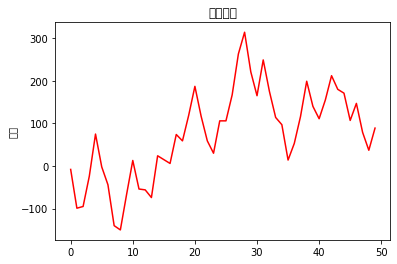

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(50), data, 'r')
plt.title('가격추이')
plt.ylabel('가격')
plt.show()

- 한글이 제대로 표시되지않는다.
한글폰트가 설치되어 있지 않거나, 한글폰트를 사용하도록 설정되어 있지 않은 경우이다.

- 한글 폰트 설치한다.
```bash
mspark@j:~$ sudo apt update
mspark@j:~$ sudo apt install fonts-nanum*
```

- 다운로드 후에 캐쉬 삭제
```bash
mspark@j:~$ sudo fc-cache -fv
```



In [7]:
# 한글 폰트 설치한다.

!ls -l /usr/share/fonts/truetype | grep nanum

drwxr-xr-x 2 root   root   4096  3월 13 21:24 nanum


In [8]:
# 한글 폰트 설치한다.

!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf	NanumMyeongjoBold.ttf
NanumBarunGothicLight.ttf	NanumMyeongjoEcoBold.ttf
NanumBarunGothic.ttf		NanumMyeongjoEcoExtraBold.ttf
NanumBarunGothicUltraLight.ttf	NanumMyeongjoEco.ttf
NanumBarunpenB.ttf		NanumMyeongjoExtraBold.ttf
NanumBarunpenR.ttf		NanumMyeongjo.ttf
NanumBrush.ttf			NanumPen.ttf
NanumGothicBold.ttf		NanumSquareB.ttf
NanumGothicCoding-Bold.ttf	NanumSquareEB.ttf
NanumGothicCoding.ttf		NanumSquareL.ttf
NanumGothicEcoBold.ttf		NanumSquareRoundB.ttf
NanumGothicEcoExtraBold.ttf	NanumSquareRoundEB.ttf
NanumGothicEco.ttf		NanumSquareRoundL.ttf
NanumGothicExtraBold.ttf	NanumSquareRoundR.ttf
NanumGothicLight.ttf		NanumSquareR.ttf
NanumGothic.ttf


In [9]:
# Matplotlib 설정 파일 위치

import matplotlib

print("설정파일 위치 :", matplotlib.matplotlib_fname())

# 설정파일 위치 : /home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
#
# matplotlibrc 는 파일명이고,
# /home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/ 까지가 경로이다.
# 그 아래에 font/ttf 디렉토리가 있고, 여기에 앞서 조회한 파일을 복사한다.

설정파일 위치 : /home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


- matplotlib 폰트에 나눔글씨체를 복사
```bash
mspark@j:~$ sudo cp /usr/share/fonts/truetype/nanum/*.ttf ~/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/
```
- 홈디렉토리에 matplotlib 캐쉬 삭제
```bash
mspark@j:~$ rm ~/.config/matplotlib/ -rf
```

### 사용 가능한 ttf 폰트 목록

사용가능한 ttf(true type font)폰트 목록은 다음 리스트로 간단하게 얻을 수 있다

- matplotlib.font_manager.fontManager.ttflist 

In [10]:
# 사용 가능한 ttf 폰트 목록

import matplotlib
import matplotlib.font_manager

# matplotlib.font_manager.fontManager.ttflist 
[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoBold.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicLight.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',
 '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/f

- 사용가능한 폰트 목록 중 나눔글꼴(이름에 'Nanum'이 포함된) 폰트 목록만 추출

In [11]:
# 나눔글꼴 (이름에 'Nanum'이 포함된) 폰트 목록

import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
# [(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]


[('NanumMyeongjo Eco',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoBold.ttf'),
 ('NanumGothic',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicLight.ttf'),
 ('NanumSquare',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf'),
 ('NanumGothic Eco',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicEco.ttf'),
 ('NanumSquare',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareB.ttf'),
 ('NanumSquareRound',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf'),
 ('NanumBarunGothic',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicBold.ttf'),
 ('NanumGothic',
  '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'),
 ('Na

### 폰트를 지정하는 두가지 방법

matplotlib에서 폰트를 지정하여 출력하는 대표적인 방법 두가지

1. 텍스트 출력시 폰트 특성을 지정 : FontProperties 속성으로 폰트 속성을 지정

2. 전역으로 지정 : rcParms를 사용하여 전역으로 설정값을 지정

### 텍스트 출력시 폰트 특성을 지정

텍스트를 출력하는 담음 함수들을 사용할 때, fontproperties 인자에 폰트를 지정할 수 있다.

matplotlib.pyplot
- title()
- xlabel()
- ylabel()
- legend()
- text()

matplotlib.axes
- set_title()

예를들어, 다음과 같이 텍스트와 폰트를 지정하여 출력할 수 있다.
- matplotlib.text(0,0, "sample text", fontproperties=fontprop)

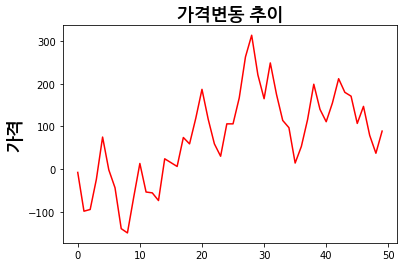

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

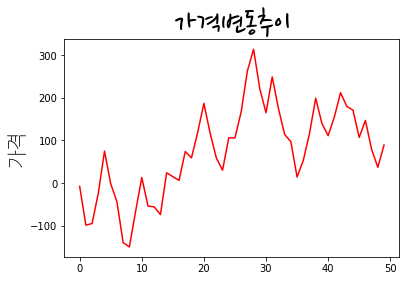

In [11]:
# TTF 파일을 직접 지정하는 방법

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path_gothic = '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicLight.ttf'
font_gothic = fm.FontProperties(fname=path_gothic, size=20)

path_pen = '/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumPen.ttf'
font_pen = fm.FontProperties(fname=path_pen, size=34)

plt.plot(range(50), data, 'r')
plt.ylabel('가격', fontproperties=font_gothic)
plt.title('가격변동추이', fontproperties=font_pen)
plt.show()

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf:size=18.0


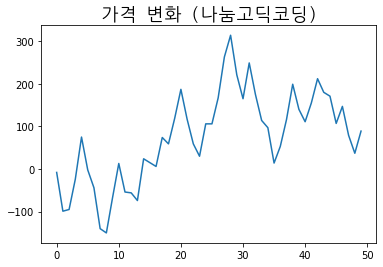

In [12]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
prop = fm.FontProperties(fname=path, size=18)
print(prop)
fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('가격 변화 (나눔고딕코딩)', fontproperties=prop)

plt.show()

### 폰트 파일의 위치

- 폰트가 항상 '/usr/share/fonts'에 있어야 하는 것은 아니다.


- ttf 폰트 파일을 복사해서 바로 사용할 수도 있다.
현대 디렉토리에 NanumGothic-ExtraBold.ttf 파일을 복사하여 사용할 수 있다.

In [13]:
ls -al

total 10264
drwxr-xr-x  4 mspark users     4096  3월 14 00:57 ./
drwxrwxr-x 13 mspark mspark    4096  3월 14 11:43 ../
drwxr-xr-x  2 mspark users     4096  3월 14 00:51 .ipynb_checkpoints/
-rw-r--r--  1 mspark users   257073  3월 14 00:57 matplotlib_basic_한글_20210313.ipynb
-rw-rw-r--  1 mspark mspark 3883296  3월 13 23:57 NanumGothic-ExtraBold.ttf
drwxrwxr-x  3 mspark mspark    4096  3월 14 00:05 tvN10font_TTF/
-rw-rw-r--  1 mspark mspark 2902672  9월 13  2016 tvN_Bold.ttf
-rw-rw-r--  1 mspark mspark 3442816  9월 13  2016 tvN_Light.ttf


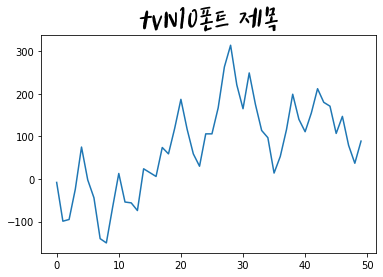

In [14]:
import matplotlib.font_manager as fm

fontprop = fm.FontProperties(fname="./tvN_Bold.ttf", size=34)

plt.title('tvN10폰트 제목', fontproperties=fontprop)
plt.plot(data)
plt.show()

### 전역 글꼴 설정 : matplotlib.rcParams[]

matplotlib.rcParams를 통해 matplotlib의 다양한 설정값을 읽거나 지정할 수 있다.

https://matplotlib.org/users/customizing.html

In [15]:
# 기본 설정 읽기

import matplotlib.pyplot as plt

# size, family
print(plt.rcParams['font.size'])
print(plt.rcParams['font.family'])

10.0
['sans-serif']


In [16]:
# serif, sans-serif, monospace
print(plt.rcParams['font.serif'])
print(plt.rcParams['font.sans-serif'])
print(plt.rcParams['font.monospace'])

['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


- 폰트의 기본값들을 다음과 같이 설정할 수 있다

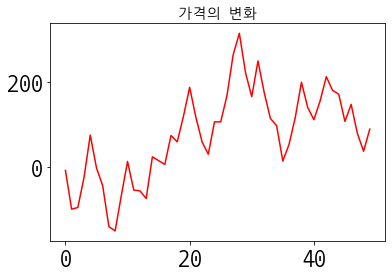

In [17]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rc('axes', unicode_minus=True) # RuntimeWarning: Glyph 8722 missing from current font.
plt.rcParams['font.size'] = 12.
plt.rcParams['xtick.labelsize'] = 24.
plt.rcParams['ytick.labelsize'] = 24.
plt.rcParams['axes.labelsize'] = 20.

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

- 레이블에 '-'가 있는 경우 유니코드의 '-'문자를 그대로 출력하면 '-' 부호만 깨져 보인다. 이를 방지하기 위해 'axes.unicode_minus' 옵션을 False로 지정한다.


- RuntimeWarning: Glyph 8722 missing from current font.

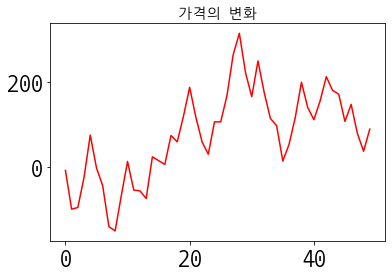

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rc('axes', unicode_minus=False) # RuntimeWarning: Glyph 8722 missing from current font.
plt.rcParams['font.size'] = 12.
plt.rcParams['xtick.labelsize'] = 24.
plt.rcParams['ytick.labelsize'] = 24.
plt.rcParams['axes.labelsize'] = 20.

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

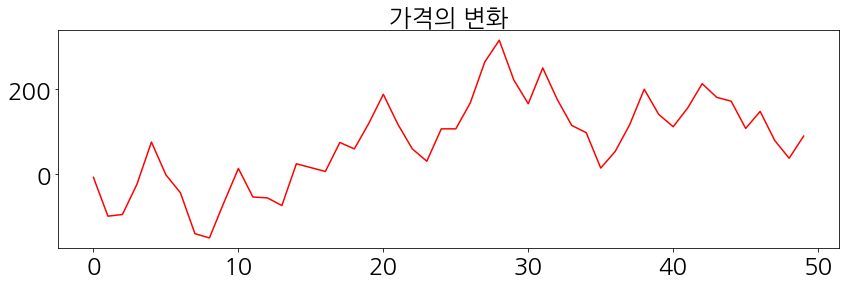

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()

### TTF 파일에서 폰트 이름 얻어 전역 설정

- 'font-family'에 지정할 이름을 .ttf 파일로 부터 얻을 수 있다.

In [20]:
from matplotlib import font_manager, rc

font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
print(font_name)

NanumGothic


### (참고) 시스템에 설치된 글꼴 확인

- Ubuntu 에 설치되이 있는 글꼴 목록을 fc-list 명령어로 볼 수 있다.

In [21]:
# 전체 글꼴 중 처음 10개만 출력

! fc-list | head -10

/usr/share/fonts/truetype/tlwg/TlwgTypo-Bold.ttf: Tlwg Typo:style=Bold
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf: DejaVu Serif:style=Bold
/usr/share/fonts/opentype/urw-base35/URWBookman-LightItalic.otf: URW Bookman:style=Light Italic
/usr/share/fonts/truetype/fonts-kalapi/Kalapi.ttf: Kalapi:style=Regular
/usr/share/fonts/truetype/fonts-gujr-extra/Rekha.ttf: Rekha:style=Medium
/usr/share/fonts/truetype/tlwg/TlwgTypewriter-BoldOblique.ttf: Tlwg Typewriter:style=Bold Oblique
/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf: URW Bookman:style=Light
/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf: DejaVu Sans Mono:style=Book
/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf: Ubuntu Mono:style=Italic
/usr/share/fonts/truetype/malayalam/Rachana-Regular.ttf: Rachana:style=Regular


In [22]:
# 한글 글꼴만 보려면 ':lang=ko' 옵션을 지정
# 한글 글꼴 전체에서 .ttf 만 출력

! fc-list :lang=ko | grep 손

/usr/share/fonts/truetype/nanum/NanumBrush.ttf: Nanum Brush Script,나눔손글씨 붓:style=Regular
/usr/share/fonts/truetype/nanum/NanumPen.ttf: Nanum Pen Script,나눔손글씨 펜:style=Regular


In [30]:
# 사용가능한 시스템의 TTF 폰트 목록
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
font_list

305


['/usr/share/fonts/truetype/tlwg/TlwgTypewriter-BoldOblique.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-LightOblique.ttf',
 '/usr/share/fonts/truetype/lohit-devanagari/Lohit-Devanagari.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Medium.ttc',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-SemiBold.ttc',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Regular.otf',
 '/usr/share/fonts/opentype/urw-base35/P052-BoldItalic.otf',
 '/usr/share/fonts/truetype/Gubbi/Gubbi.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypewriter.ttf',
 '/usr/share/fonts/truetype/malayalam/Suruma.ttf',
 '/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc',
 '/usr/share/fonts/opentype/urw-base35/Z003-MediumItalic.otf',
 '/usr/share/fonts/truetype/freefont/FreeSansBoldOblique.ttf'

In [23]:
# matplotlib 설정 파일의 위치

matplotlib.matplotlib_fname()

'/home/mspark/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [24]:
# 캐쉬 디렉토리

matplotlib.get_cachedir()

'/home/mspark/.cache/matplotlib'